# CAPSTONE TWO: NEGATIVE INCOME TAX EXPERIMENTS

## IMPORTS

In [1]:
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from mlxtend.plotting import plot_decision_regions
from scipy import stats
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, fbeta_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.utils.multiclass import unique_labels
from statsmodels.tsa.stattools import acf
from sklearn import ensemble
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

## THE PERSON FILE

We need to read in the person file, which contains the target data as well as other data, and merge it with the family file which contains the treatment level and the poverty level.

In [2]:
#GARY_FILE_PERSON_RECORD'
GARY_FILE_PERSON_RECORD_PATH = 'https://raw.githubusercontent.com/luke-swans0n/NIT/main/GARY_DATA/ca033001.dat'
var_list = ['FAMNUM', 'PERNUM', 'STATUS1-48', 'MOPRES1-48', 'MRST1-48', 'RELCODE1-48',\
            'DOB', 'SEX', 'ENRLDATE','ATTDATE', 'DENRLDAT', 'GRADE71', 'SCHTYP71', 'GRADE72', 'SCHTYP72',\
            'GRADE73', 'SCHTYP73','EVEREMP','FAMBUS','YRSTWRK', 'YRFTWRK', 'JOBTOTAL', 'JOBS5YRS',\
            'JOBS3YRS', 'JOBS1YR','INCOME69', 'EMPLOYED','LABRSTAT', 'MONTHS', 'INDUSTRY','OCCUPA',\
            'HRSVARY', 'SEASON','RCNTHRS', 'RCNTOT', 'RCNTWAGR', 'RCNTOTR', 'RCNTPAY',\
			'NRMLHRS', 'NRMLOT', 'NRMLWAGR', 'NRMLOTR', 'NRMLPAY', 'DAYHRSR', 'DAYRATER', 'DAYPAYR', 'DAYHRSN',\
            'DAYRATEN', 'DAYPAYN', 'MOSNOWRK','PLANWORK', 'SSI1-48', 'TTI1-48', 'SS1-48',\
            'VA1-48', 'MISINC1-48','OTHINC1-48', 'JOBSINC1-48', 'DAYINC1-48', 'OJINC1-48',\
            'UEMBEN1-48','STRKWC1-48', 'EMPSTAT1-9', 'TYPWRKR1-9', 'WYNOWRK1-9', 'HRSWEEK1-9',\
            'OTHRSWK1-9', 'HRSREG1-9', 'OTHREG1-9','DSABLED1-9', 'DISLMIT1-9', 'TYPWRK1-48',\
            'PCTEMP1-48', 'PCTWRK1-48', 'REASON1-48', 'PCNTLF1-48', 'PCTUMP1-48','EMPSTA1-48',\
            'DISABL1-48', 'NUMJBS1-48', 'EXPER1-48', 'INDUS1-48', 'OCCUP1-48', 'WKRLNG1-48',\
            'HOURS1-48','HRCHNG1-48', 'OTHRS1-48', 'WGRATE1-48', 'WGCHNG1-48', 'SINWGS69-73',\
            'SJTWGS69-73', 'WAGES70', 'QTRWRK70', 'WGSECON','WGSART1-16', 'UNEMP1-48', 'OTRATE1-48',\
            'GWAGES0-42', 'FTXWTH0-42', 'STXWTH0-42', 'FICA0-42', 'JOBS0-42', 'HRSWRK0-42',\
            'REGHRS0-42', 'OVRTME0-42', 'SPECL0-42', 'SPCLCD0-42', 'AFDC1970', 'AFDCM070',\
            'AFDCBASE', 'AFDC1-48','AFDCEL1-48', 'SSI1970', 'SSIMOS70', 'SSIBASE']
data_set = []
with open(GARY_FILE_PERSON_RECORD_PATH) as file:
	for line in file:
		data = [line[1-1:4],\
				line[5-1:10],\
				line[11-1:106],\
				line[107-1:154],\
				line[155-1:250],\
				line[251-1:346],\
				line[347-1:350],\
                line[350],\
				line[352-1:356],\
				line[357-1:361],\
				line[362-1:366],\
				line[367-1:368],\
				line[369-1:370],\
				line[371-1:372],\
				line[373-1:374],\
				line[375-1:376],\
				line[377-1:378],\
				line[380-1:381],\
				line[382-1:383],\
				line[384-1:385],\
				line[386-1:387],\
				line[388-1:389],\
				line[390-1:391],\
				line[392-1:393],\
				line[394-1:395],\
				line[396-1:400],\
				line[401-1:402],\
				line[403-1:404],\
				line[405-1:407],\
				line[408-1:410],\
				line[411-1:413],\
				line[414-1:415],\
				line[416-1:417],\
				line[418-1:420],\
				line[421-1:422],\
				line[423-1:426],\
				line[427-1:430],\
				line[431-1:436],\
				line[437-1:439],\
				line[440-1:441],\
				line[442-1:445],\
				line[446-1:449],\
                line[449:455],\
				line[456-1:458],\
				line[459-1:462],\
				line[463-1:468],\
				line[469-1:471],\
				line[472-1:475],\
				line[476-1:481],\
				line[482-1:483],\
				line[484-1:485],\
				line[500-1:691],\
				line[692-1:883],\
				line[884-1:1075],\
				line[1076-1:1267],\
				line[1268-1:1459],\
				line[1460-1:1651],\
				line[1652-1:1843],\
				line[1844-1:2035],\
				line[2036-1:2227],\
				line[2228-1:2419],\
				line[2420-1:2611],\
				line[2612-1:2629],\
				line[2630-1:2647],\
				line[2648-1:2665],\
				line[2666-1:2692],\
				line[2693-1:2719],\
				line[2720-1:2746],\
				line[2747-1:2773],\
				line[2774-1:2791],\
				line[2792-1:2809],\
				line[2810-1:2905],\
				line[2906-1:3097],\
				line[3098-1:3289],\
				line[3290-1:3385],\
				line[3386-1:3577],\
				line[3578-1:3769],\
				line[3770-1:3865],\
				line[3866-1:3961],\
				line[3962-1:4057],\
				line[4058-1:4201],\
				line[4202-1:4345],\
				line[4346-1:4537],\
				line[4538-1:4729],\
				line[4730-1:4921],\
				line[4922-1:5017],\
				line[5018-1:5209],\
				line[5210-1:5401],\
				line[5402-1:5497],\
				line[8415-1:8444],\
				line[8445-1:8474],\
				line[8475-1:8479],\
				line[8480-1:8481],\
				line[8482-1:8485],\
				line[8486-1:8549],\
				line[8550-1:8741],\
				line[5498-1:5593],\
				line[5594-1:5765],\
				line[5766-1:5937],\
				line[5938-1:6109],\
				line[6110-1:6281],\
				line[6282-1:6496],\
				line[6497-1:6582],\
				line[6583-1:6754],\
				line[6927-1:7098],\
				line[7099-1:7270],\
				line[7271-1:7356],\
				line[7357-1:7360],\
				line[7361-1:7362],\
				line[7363-1:7366],\
				line[7367-1:7558],\
				line[7559-1:7750],\
				line[7751-1:7754],\
				line[7755-1:7756],\
				line[7757-1:7760]]
		data_set.append(data)
    

In [3]:
person_df = pd.DataFrame(np.array(data_set), columns=var_list)

## THE FAMILY FILE

In [4]:
var_list = ['FAMNUM', 'POVLEV', 'TREATLEV']
data_set = []
with open('https://raw.githubusercontent.com/luke-swans0n/NIT/main/GARY_DATA/ca033002.dat') as file:
    for line in file:
        data = [line[0:4], line[6], line[8]]
        data_set.append(data)

In [5]:
fam_df = pd.DataFrame(np.array(data_set), columns = var_list)

## MERGING

We use an outer merge here to collect all of the entries from both tables.

In [6]:
fam_df.FAMNUM.astype(int)
person_df.FAMNUM.astype(int)
gary_df = person_df.merge(fam_df, on='FAMNUM', how='outer')
gary_df.describe()

,FAMNUM,PERNUM,STATUS1-48,MOPRES1-48,MRST1-48,RELCODE1-48,DOB,SEX,ENRLDATE,ATTDATE,...,AFDC1970,AFDCM070,AFDCBASE,AFDC1-48,AFDCEL1-48,SSI1970,SSIMOS70,SSIBASE,POVLEV,TREATLEV
count,5343,5343,5343,5343,5343,5343,5343,5343,5343,5343,...,5343,5343,5343,5343,5343,5343,5343,5343,5326,5326
unique,1821,5343,984,1025,757,1770,686,2,166,159,...,252,13,77,1023,1028,32,9,21,5,5
top,7333,919701,0000000204040404040404040404040404040404040404...,999222222222222222222222222222222222222222222222,9797970505050505050505050505050505050505050505...,9701010101010101010101010101010101010101010101...,9994,2,71095,00000,...,9993,93,9993,0000000000000000000000000000000000000000000000...,0000000000000000000000000000000000000000000000...,9993,93,9993,4,0
freq,12,1,824,824,346,350,178,3232,220,4502,...,4492,4492,4492,3471,3471,5245,5245,5245,1608,2206


## SOME VISUALIZATIONS

(array([1324.,    0.,  818.,    0.,    0., 1021.,    0., 1015.,    0.,
         307.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

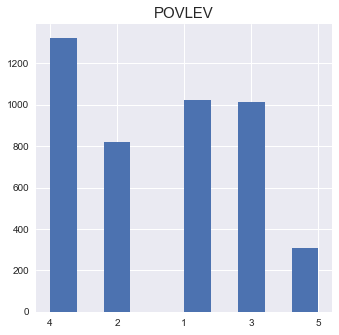

In [48]:
matplotlib.style.use('seaborn')
plt.figure(figsize=(18,18))
plt.subplot(3,3,1)
plt.gca().set_title('POVLEV',  fontsize = 15)
plt.hist(gary_df['POVLEV'])

In [ ]:
matplotlib.style.use('seaborn')
plt.figure(figsize=(18,18))
plt.subplot(3,3,1)
plt.gca().set_title('TREATLEV',  fontsize = 15)
plt.hist(gary_df['TREATLEV'])

## DATA CLEANING

### HANDLING NULLS

dropping families with no people and people with no families (this was due to a record-keeping error on the part of the experimenters. Families starting with number 4 are supposed to be in the Sacramento file, not Gary).

In [7]:
gary_df.dropna(inplace=True)

Converting some of the more-common missing data codes

In [8]:
gary_df.replace(['9997', '9999','9993','9994', '97', '93'], np.NaN, inplace=True)

dropping the columns with > 75% of their entries being left blank

In [9]:
def percent_miss(df):
    # returns the percent of entries that are None in each column.
   return df.isnull().sum()/df.isnull().count()
bad_cols = gary_df.loc[:,(percent_miss(gary_df) > 0.75)].columns
gary_df.drop(bad_cols, axis=1, inplace= True)

ATTDATE stands for attrition date, meaning what date the family left the experiment before it ended. These families left because they either moved away, stopped responding to experimenters, or the active filing member passed. They're being dropped here as we are interested in effects of welfare over time and these cutoff early.

In [10]:
gary_df = gary_df.loc[gary_df['ATTDATE'] == '00000',:]
gary_df.drop(['ATTDATE', 'FAMNUM'], axis=1, inplace=True)

## Encoding

Many of the comments within this section are ideas for further analysis, or methods of data cleaning attempted that either failed or were too large of a time sink to complete.

In [12]:
#gary_df = gary_df.loc[gary_df['TREATLEV'] != '0']
#gary_control_df = gary_df.loc[gary_df['TREATLEV'] == '0']

In [13]:
gary_df.set_index('PERNUM', inplace=True)
gary_simp_df = pd.get_dummies(gary_df['TREATLEV'], drop_first=True)
#gary_df.drop(['TREATLEV'], axis=1, inplace=True)
col_dict = {1:'TREATLEV_1', 2: 'TREATLEV_2', 3:'TREATLEV_3', 4:'TREATLEV_4'}
gary_simp_df.rename(columns = col_dict, inplace=True)

In [14]:
gary_simp_df = pd.concat([gary_simp_df, pd.get_dummies(gary_df['POVLEV'], drop_first=True)], axis=1)
#gary_df.drop(['POVLEV'], axis=1, inplace=True)
col_dict = {2:'POV_LEV_2', 3: 'POV_LEV_3', 4:'POV_LEV_4', 5:'POV_LEV_5'}
gary_simp_df.rename(columns = col_dict, inplace=True)

This section of comments was my attempt to take the time-data and parse it out to hopefully generate new rows of data from them. Given more time, I would greatly expand this section, as it has the most potential and would give me the tools to make good features.

In [15]:
'''def chunkstring(string, length):
    return [string[0+i:length+i] for i in range(0, len(string), length)]
for column in gary_df.columns:
    if '-48' in column:
        leng = int(gary_df[column].str.len().unique() /48)
        gary_df[column] = gary_df[column].apply(chunkstring, args=[leng])
    if '-43' in column:
        leng = int(gary_df[column].str.len().unique() /43)
        gary_df[column] = gary_df[column].apply(chunkstring, args=[leng])
    if '-42' in column:
        leng = int(gary_df[column].str.len().unique() /42)
        gary_df[column] = gary_df[column].apply(chunkstring, args=[leng])
    if '-9' in column:
        leng = int(gary_df[column].str.len().unique() /9)
        gary_df[column] = gary_df[column].apply(chunkstring, args=[leng])
 '''       

"def chunkstring(string, length):\n    return [string[0+i:length+i] for i in range(0, len(string), length)]\nfor column in gary_df.columns:\n    if '-48' in column:\n        leng = int(gary_df[column].str.len().unique() /48)\n        gary_df[column] = gary_df[column].apply(chunkstring, args=[leng])\n    if '-43' in column:\n        leng = int(gary_df[column].str.len().unique() /43)\n        gary_df[column] = gary_df[column].apply(chunkstring, args=[leng])\n    if '-42' in column:\n        leng = int(gary_df[column].str.len().unique() /42)\n        gary_df[column] = gary_df[column].apply(chunkstring, args=[leng])\n    if '-9' in column:\n        leng = int(gary_df[column].str.len().unique() /9)\n        gary_df[column] = gary_df[column].apply(chunkstring, args=[leng])\n "

In [16]:
'''
for column in gary_df.columns:
    if '-48' in column:
        leng = int(gary_df[column].str.len().unique() /48)
        basename = column
        for i in range(48):
            gary_df[basename+'-Month'+str(i)] = gary_df[column][i:i+leng]
gary_df.head()
'''

"\nfor column in gary_df.columns:\n    if '-48' in column:\n        leng = int(gary_df[column].str.len().unique() /48)\n        basename = column\n        for i in range(48):\n            gary_df[basename+'-Month'+str(i)] = gary_df[column][i:i+leng]\ngary_df.head()\n"

Renaming the column for the sake of ease in coding.

In [17]:
#gary_df.set_index('PERNUM', inplace=True)
#periodic_columns =['SSI1-48', 'TTI1-48', 'SS1-48', 'VA1-48', 'MISINC1-48',
#                   'OTHINC1-48', 'JOBINC1-48', 'DAYINC1-48', 'OJINC1-48',
#                  'UEMBEN1-48', 'STRKWC1-48']
gary_df.rename(columns= {'EMPSTAT1-9': 'EMPSTAT'}, inplace = True)
gary_df.info

<bound method DataFrame.info of                                                STATUS1-48  \
PERNUM                                                      
500001  0000000000000204040404040404040404040404040404...   
500401  0000000000020404040404040404040404040404040404...   
500501  0000000000020404040404040404040404040404040404...   
500601  0000000000020404040404040404040404040404040404...   
500801  0000000000020404040404040404040404040404040404...   
...                                                   ...   
969103  0000000000020404040404040404040404040404040404...   
969104  0000000000020404040404040404040404040404040404...   
969105  0000000000020404040404040404040404040404040404...   
969106  0000000000020404040404040404040404040404040404...   
969201  0000000000020404040404040404040404040404040404...   

                                              MOPRES1-48  \
PERNUM                                                     
500001  9999992222222222222222222222222222222222222222

Ruling out persons for which employment status data was never collected. 

In [18]:
gary_simp_df['EMPSTAT'] = gary_df.loc[gary_df.EMPSTAT.str.contains('00|01|02', regex=True),'EMPSTAT']

In [19]:
gary_simp_df.dropna(axis=0, inplace=True)

Unemployed + Actively seeking work, Employed -> in the labor force -> 1   
Unemployed + not actively seeking work -> not in labor force -> 0

In [20]:
gary_simp_df.loc[(gary_simp_df.EMPSTAT.str.contains('(01)', regex=True)),'EMPSTAT']= '1'
gary_simp_df.loc[(gary_simp_df.EMPSTAT.str.contains('(00)', regex=True)),'EMPSTAT']= '1'
#gary_simp_df.loc[(gary_simp_df.EMPSTAT.str.contains('(00)(02)', regex=True)),'EMPSTAT']= 0


C:\Users\thebi\anaconda3\lib\site-packages\pandas\core\strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [21]:
gary_simp_df.loc[gary_simp_df['EMPSTAT'] != '1', 'EMPSTAT'] ='0'

In [22]:
gary_simp_df

,1,2,3,4,2,3,4,5,EMPSTAT
PERNUM,,,,,,,,,
500001,0,0,0,0,0,0,1,0,0
500401,0,0,0,0,1,0,0,0,1
500501,0,0,0,0,0,0,0,0,1
500601,0,0,1,0,0,0,1,0,1
500801,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
967802,1,0,0,0,0,1,0,0,1
968001,0,0,0,0,1,0,0,0,1
969101,0,0,0,0,0,0,1,0,1


## MODELLING

In [56]:
X= gary_simp_df.drop('EMPSTAT', axis=1)
Y= gary_simp_df['EMPSTAT']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=2, stratify = Y)
print(y_train, y_test, X_train, X_test)

PERNUM
811104    1
920604    0
558001    1
788805    1
551003    1
         ..
966001    1
771102    1
565702    0
758101    1
833202    0
Name: EMPSTAT, Length: 3284, dtype: object PERNUM
554901    1
943501    1
958203    1
940701    0
845602    0
         ..
577013    0
779903    1
790902    0
564201    1
903401    0
Name: EMPSTAT, Length: 822, dtype: object         1  2  3  4  2  3  4  5
PERNUM                        
811104  0  0  1  0  0  0  0  1
920604  1  0  0  0  1  0  0  0
558001  0  0  0  0  1  0  0  0
788805  0  1  0  0  1  0  0  0
551003  1  0  0  0  0  0  0  0
...    .. .. .. .. .. .. .. ..
966001  0  0  0  0  1  0  0  0
771102  0  0  0  1  0  0  1  0
565702  0  0  0  0  1  0  0  0
758101  1  0  0  0  0  1  0  0
833202  1  0  0  0  0  1  0  0

[3284 rows x 8 columns]         1  2  3  4  2  3  4  5
PERNUM                        
554901  1  0  0  0  0  1  0  0
943501  1  0  0  0  0  1  0  0
958203  0  1  0  0  0  0  1  0
940701  0  0  1  0  1  0  0  0
845602  0  0  0  0  0  

## Dummy-test

In [40]:
dummy = DummyClassifier(strategy = 'most_frequent')
dummy.fit(X_train, y_train)
dummy.score(X_test, y_test)

0.5936739659367397

In [41]:
dummy_report = classification_report(y_test, dummy.predict(X_test), target_names = ['Not in Labor', 'In Labor']
print(dummy_report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       334
           1       0.59      1.00      0.75       488

    accuracy                           0.59       822
   macro avg       0.30      0.50      0.37       822
weighted avg       0.35      0.59      0.44       822



C:\Users\thebi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
lr = LogisticRegression()
grid = GridSearchCV(estimator=lr,\
                   param_grid = { \
                                'C' : np.arange(0.05, 1.0, .05),\
                                'penalty' : ['l2'],\
                                'max_iter' : np.arange(500, 5000, 500)},
                   verbose = 2)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 171 candidates, totalling 855 fits
[CV] C=0.05, max_iter=500, penalty=l2 ................................
[CV] ................. C=0.05, max_iter=500, penalty=l2, total=   0.0s
[CV] C=0.05, max_iter=500, penalty=l2 ................................
[CV] ................. C=0.05, max_iter=500, penalty=l2, total=   0.0s
[CV] C=0.05, max_iter=500, penalty=l2 ................................
[CV] ................. C=0.05, max_iter=500, penalty=l2, total=   0.0s
[CV] C=0.05, max_iter=500, penalty=l2 ................................
[CV] ................. C=0.05, max_iter=500, penalty=l2, total=   0.0s
[CV] C=0.05, max_iter=500, penalty=l2 ................................
[CV] ................. C=0.05, max_iter=500, penalty=l2, total=   0.0s
[CV] C=0.05, max_iter=1000, penalty=l2 ...............................
[CV] ................ C=0.05, max_iter=1000, penalty=l2, total=   0.0s
[CV] C=0.05, max_iter=1000, penalty=l2 ...............................
[CV] .........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.05, max_iter=2000, penalty=l2 ...............................
[CV] ................ C=0.05, max_iter=2000, penalty=l2, total=   0.0s
[CV] C=0.05, max_iter=2000, penalty=l2 ...............................
[CV] ................ C=0.05, max_iter=2000, penalty=l2, total=   0.0s
[CV] C=0.05, max_iter=2000, penalty=l2 ...............................
[CV] ................ C=0.05, max_iter=2000, penalty=l2, total=   0.0s
[CV] C=0.05, max_iter=2000, penalty=l2 ...............................
[CV] ................ C=0.05, max_iter=2000, penalty=l2, total=   0.0s
[CV] C=0.05, max_iter=2000, penalty=l2 ...............................
[CV] ................ C=0.05, max_iter=2000, penalty=l2, total=   0.0s
[CV] C=0.05, max_iter=2500, penalty=l2 ...............................
[CV] ................ C=0.05, max_iter=2500, penalty=l2, total=   0.0s
[CV] C=0.05, max_iter=2500, penalty=l2 ...............................
[CV] ................ C=0.05, max_iter=2500, penalty=l2, total=   0.0s
[CV] 

[CV] ................. C=0.1, max_iter=3000, penalty=l2, total=   0.0s
[CV] C=0.1, max_iter=3500, penalty=l2 ................................
[CV] ................. C=0.1, max_iter=3500, penalty=l2, total=   0.0s
[CV] C=0.1, max_iter=3500, penalty=l2 ................................
[CV] ................. C=0.1, max_iter=3500, penalty=l2, total=   0.0s
[CV] C=0.1, max_iter=3500, penalty=l2 ................................
[CV] ................. C=0.1, max_iter=3500, penalty=l2, total=   0.0s
[CV] C=0.1, max_iter=3500, penalty=l2 ................................
[CV] ................. C=0.1, max_iter=3500, penalty=l2, total=   0.0s
[CV] C=0.1, max_iter=3500, penalty=l2 ................................
[CV] ................. C=0.1, max_iter=3500, penalty=l2, total=   0.0s
[CV] C=0.1, max_iter=4000, penalty=l2 ................................
[CV] ................. C=0.1, max_iter=4000, penalty=l2, total=   0.0s
[CV] C=0.1, max_iter=4000, penalty=l2 ................................
[CV] .

[CV] .................. C=0.2, max_iter=500, penalty=l2, total=   0.0s
[CV] C=0.2, max_iter=1000, penalty=l2 ................................
[CV] ................. C=0.2, max_iter=1000, penalty=l2, total=   0.0s
[CV] C=0.2, max_iter=1000, penalty=l2 ................................
[CV] ................. C=0.2, max_iter=1000, penalty=l2, total=   0.0s
[CV] C=0.2, max_iter=1000, penalty=l2 ................................
[CV] ................. C=0.2, max_iter=1000, penalty=l2, total=   0.0s
[CV] C=0.2, max_iter=1000, penalty=l2 ................................
[CV] ................. C=0.2, max_iter=1000, penalty=l2, total=   0.0s
[CV] C=0.2, max_iter=1000, penalty=l2 ................................
[CV] ................. C=0.2, max_iter=1000, penalty=l2, total=   0.0s
[CV] C=0.2, max_iter=1500, penalty=l2 ................................
[CV] ................. C=0.2, max_iter=1500, penalty=l2, total=   0.0s
[CV] C=0.2, max_iter=1500, penalty=l2 ................................
[CV] .

[CV] ................ C=0.25, max_iter=2500, penalty=l2, total=   0.0s
[CV] C=0.25, max_iter=2500, penalty=l2 ...............................
[CV] ................ C=0.25, max_iter=2500, penalty=l2, total=   0.0s
[CV] C=0.25, max_iter=3000, penalty=l2 ...............................
[CV] ................ C=0.25, max_iter=3000, penalty=l2, total=   0.0s
[CV] C=0.25, max_iter=3000, penalty=l2 ...............................
[CV] ................ C=0.25, max_iter=3000, penalty=l2, total=   0.0s
[CV] C=0.25, max_iter=3000, penalty=l2 ...............................
[CV] ................ C=0.25, max_iter=3000, penalty=l2, total=   0.0s
[CV] C=0.25, max_iter=3000, penalty=l2 ...............................
[CV] ................ C=0.25, max_iter=3000, penalty=l2, total=   0.0s
[CV] C=0.25, max_iter=3000, penalty=l2 ...............................
[CV] ................ C=0.25, max_iter=3000, penalty=l2, total=   0.0s
[CV] C=0.25, max_iter=3500, penalty=l2 ...............................
[CV] .

[CV] . C=0.35000000000000003, max_iter=1000, penalty=l2, total=   0.0s
[CV] C=0.35000000000000003, max_iter=1000, penalty=l2 ................
[CV] . C=0.35000000000000003, max_iter=1000, penalty=l2, total=   0.0s
[CV] C=0.35000000000000003, max_iter=1000, penalty=l2 ................
[CV] . C=0.35000000000000003, max_iter=1000, penalty=l2, total=   0.0s
[CV] C=0.35000000000000003, max_iter=1500, penalty=l2 ................
[CV] . C=0.35000000000000003, max_iter=1500, penalty=l2, total=   0.0s
[CV] C=0.35000000000000003, max_iter=1500, penalty=l2 ................
[CV] . C=0.35000000000000003, max_iter=1500, penalty=l2, total=   0.0s
[CV] C=0.35000000000000003, max_iter=1500, penalty=l2 ................
[CV] . C=0.35000000000000003, max_iter=1500, penalty=l2, total=   0.0s
[CV] C=0.35000000000000003, max_iter=1500, penalty=l2 ................
[CV] . C=0.35000000000000003, max_iter=1500, penalty=l2, total=   0.0s
[CV] C=0.35000000000000003, max_iter=1500, penalty=l2 ................
[CV] .

[CV] ................. C=0.4, max_iter=3500, penalty=l2, total=   0.0s
[CV] C=0.4, max_iter=3500, penalty=l2 ................................
[CV] ................. C=0.4, max_iter=3500, penalty=l2, total=   0.0s
[CV] C=0.4, max_iter=4000, penalty=l2 ................................
[CV] ................. C=0.4, max_iter=4000, penalty=l2, total=   0.0s
[CV] C=0.4, max_iter=4000, penalty=l2 ................................
[CV] ................. C=0.4, max_iter=4000, penalty=l2, total=   0.0s
[CV] C=0.4, max_iter=4000, penalty=l2 ................................
[CV] ................. C=0.4, max_iter=4000, penalty=l2, total=   0.0s
[CV] C=0.4, max_iter=4000, penalty=l2 ................................
[CV] ................. C=0.4, max_iter=4000, penalty=l2, total=   0.0s
[CV] C=0.4, max_iter=4000, penalty=l2 ................................
[CV] ................. C=0.4, max_iter=4000, penalty=l2, total=   0.0s
[CV] C=0.4, max_iter=4500, penalty=l2 ................................
[CV] .

[CV] ................. C=0.5, max_iter=1500, penalty=l2, total=   0.0s
[CV] C=0.5, max_iter=2000, penalty=l2 ................................
[CV] ................. C=0.5, max_iter=2000, penalty=l2, total=   0.0s
[CV] C=0.5, max_iter=2000, penalty=l2 ................................
[CV] ................. C=0.5, max_iter=2000, penalty=l2, total=   0.0s
[CV] C=0.5, max_iter=2000, penalty=l2 ................................
[CV] ................. C=0.5, max_iter=2000, penalty=l2, total=   0.0s
[CV] C=0.5, max_iter=2000, penalty=l2 ................................
[CV] ................. C=0.5, max_iter=2000, penalty=l2, total=   0.0s
[CV] C=0.5, max_iter=2000, penalty=l2 ................................
[CV] ................. C=0.5, max_iter=2000, penalty=l2, total=   0.0s
[CV] C=0.5, max_iter=2500, penalty=l2 ................................
[CV] ................. C=0.5, max_iter=2500, penalty=l2, total=   0.0s
[CV] C=0.5, max_iter=2500, penalty=l2 ................................
[CV] .

[CV] ................ C=0.55, max_iter=4000, penalty=l2, total=   0.0s
[CV] C=0.55, max_iter=4500, penalty=l2 ...............................
[CV] ................ C=0.55, max_iter=4500, penalty=l2, total=   0.0s
[CV] C=0.55, max_iter=4500, penalty=l2 ...............................
[CV] ................ C=0.55, max_iter=4500, penalty=l2, total=   0.0s
[CV] C=0.55, max_iter=4500, penalty=l2 ...............................
[CV] ................ C=0.55, max_iter=4500, penalty=l2, total=   0.0s
[CV] C=0.55, max_iter=4500, penalty=l2 ...............................
[CV] ................ C=0.55, max_iter=4500, penalty=l2, total=   0.0s
[CV] C=0.55, max_iter=4500, penalty=l2 ...............................
[CV] ................ C=0.55, max_iter=4500, penalty=l2, total=   0.0s
[CV] C=0.6000000000000001, max_iter=500, penalty=l2 ..................
[CV] ... C=0.6000000000000001, max_iter=500, penalty=l2, total=   0.0s
[CV] C=0.6000000000000001, max_iter=500, penalty=l2 ..................
[CV] .

[CV] .. C=0.6500000000000001, max_iter=2500, penalty=l2, total=   0.0s
[CV] C=0.6500000000000001, max_iter=2500, penalty=l2 .................
[CV] .. C=0.6500000000000001, max_iter=2500, penalty=l2, total=   0.0s
[CV] C=0.6500000000000001, max_iter=2500, penalty=l2 .................
[CV] .. C=0.6500000000000001, max_iter=2500, penalty=l2, total=   0.0s
[CV] C=0.6500000000000001, max_iter=2500, penalty=l2 .................
[CV] .. C=0.6500000000000001, max_iter=2500, penalty=l2, total=   0.0s
[CV] C=0.6500000000000001, max_iter=3000, penalty=l2 .................
[CV] .. C=0.6500000000000001, max_iter=3000, penalty=l2, total=   0.0s
[CV] C=0.6500000000000001, max_iter=3000, penalty=l2 .................
[CV] .. C=0.6500000000000001, max_iter=3000, penalty=l2, total=   0.0s
[CV] C=0.6500000000000001, max_iter=3000, penalty=l2 .................
[CV] .. C=0.6500000000000001, max_iter=3000, penalty=l2, total=   0.0s
[CV] C=0.6500000000000001, max_iter=3000, penalty=l2 .................
[CV] .

[CV] .. C=0.7500000000000001, max_iter=1000, penalty=l2, total=   0.0s
[CV] C=0.7500000000000001, max_iter=1000, penalty=l2 .................
[CV] .. C=0.7500000000000001, max_iter=1000, penalty=l2, total=   0.0s
[CV] C=0.7500000000000001, max_iter=1000, penalty=l2 .................
[CV] .. C=0.7500000000000001, max_iter=1000, penalty=l2, total=   0.0s
[CV] C=0.7500000000000001, max_iter=1000, penalty=l2 .................
[CV] .. C=0.7500000000000001, max_iter=1000, penalty=l2, total=   0.0s
[CV] C=0.7500000000000001, max_iter=1000, penalty=l2 .................
[CV] .. C=0.7500000000000001, max_iter=1000, penalty=l2, total=   0.0s
[CV] C=0.7500000000000001, max_iter=1500, penalty=l2 .................
[CV] .. C=0.7500000000000001, max_iter=1500, penalty=l2, total=   0.0s
[CV] C=0.7500000000000001, max_iter=1500, penalty=l2 .................
[CV] .. C=0.7500000000000001, max_iter=1500, penalty=l2, total=   0.0s
[CV] C=0.7500000000000001, max_iter=1500, penalty=l2 .................
[CV] .

[CV] ................. C=0.8, max_iter=3500, penalty=l2, total=   0.0s
[CV] C=0.8, max_iter=3500, penalty=l2 ................................
[CV] ................. C=0.8, max_iter=3500, penalty=l2, total=   0.0s
[CV] C=0.8, max_iter=3500, penalty=l2 ................................
[CV] ................. C=0.8, max_iter=3500, penalty=l2, total=   0.0s
[CV] C=0.8, max_iter=3500, penalty=l2 ................................
[CV] ................. C=0.8, max_iter=3500, penalty=l2, total=   0.0s
[CV] C=0.8, max_iter=4000, penalty=l2 ................................
[CV] ................. C=0.8, max_iter=4000, penalty=l2, total=   0.0s
[CV] C=0.8, max_iter=4000, penalty=l2 ................................
[CV] ................. C=0.8, max_iter=4000, penalty=l2, total=   0.0s
[CV] C=0.8, max_iter=4000, penalty=l2 ................................
[CV] ................. C=0.8, max_iter=4000, penalty=l2, total=   0.0s
[CV] C=0.8, max_iter=4000, penalty=l2 ................................
[CV] .

[CV] .. C=0.9000000000000001, max_iter=1500, penalty=l2, total=   0.0s
[CV] C=0.9000000000000001, max_iter=1500, penalty=l2 .................
[CV] .. C=0.9000000000000001, max_iter=1500, penalty=l2, total=   0.0s
[CV] C=0.9000000000000001, max_iter=1500, penalty=l2 .................
[CV] .. C=0.9000000000000001, max_iter=1500, penalty=l2, total=   0.0s
[CV] C=0.9000000000000001, max_iter=1500, penalty=l2 .................
[CV] .. C=0.9000000000000001, max_iter=1500, penalty=l2, total=   0.0s
[CV] C=0.9000000000000001, max_iter=2000, penalty=l2 .................
[CV] .. C=0.9000000000000001, max_iter=2000, penalty=l2, total=   0.0s
[CV] C=0.9000000000000001, max_iter=2000, penalty=l2 .................
[CV] .. C=0.9000000000000001, max_iter=2000, penalty=l2, total=   0.0s
[CV] C=0.9000000000000001, max_iter=2000, penalty=l2 .................
[CV] .. C=0.9000000000000001, max_iter=2000, penalty=l2, total=   0.0s
[CV] C=0.9000000000000001, max_iter=2000, penalty=l2 .................
[CV] .

[CV] .. C=0.9500000000000001, max_iter=4000, penalty=l2, total=   0.0s
[CV] C=0.9500000000000001, max_iter=4000, penalty=l2 .................
[CV] .. C=0.9500000000000001, max_iter=4000, penalty=l2, total=   0.0s
[CV] C=0.9500000000000001, max_iter=4000, penalty=l2 .................
[CV] .. C=0.9500000000000001, max_iter=4000, penalty=l2, total=   0.0s
[CV] C=0.9500000000000001, max_iter=4500, penalty=l2 .................
[CV] .. C=0.9500000000000001, max_iter=4500, penalty=l2, total=   0.0s
[CV] C=0.9500000000000001, max_iter=4500, penalty=l2 .................
[CV] .. C=0.9500000000000001, max_iter=4500, penalty=l2, total=   0.0s
[CV] C=0.9500000000000001, max_iter=4500, penalty=l2 .................
[CV] .. C=0.9500000000000001, max_iter=4500, penalty=l2, total=   0.0s
[CV] C=0.9500000000000001, max_iter=4500, penalty=l2 .................
[CV] .. C=0.9500000000000001, max_iter=4500, penalty=l2, total=   0.0s
[CV] C=0.9500000000000001, max_iter=4500, penalty=l2 .................
[CV] .

[Parallel(n_jobs=1)]: Done 855 out of 855 | elapsed:    9.2s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
                         'max_iter': array([ 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500]),
                         'penalty': ['l2']},
             pre_dispatch='2*n_jobs', refit=

In [43]:
print(classification_report(y_test, grid.predict(X_test), target_names=['Not in Labor', 'In Labor']))
print(confusion_matrix(y_test, grid.predict(X_test)))

              precision    recall  f1-score   support

       Unemp       0.00      0.00      0.00       334
         Emp       0.59      1.00      0.75       488

    accuracy                           0.59       822
   macro avg       0.30      0.50      0.37       822
weighted avg       0.35      0.59      0.44       822

[[  0 334]
 [  0 488]]


C:\Users\thebi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**IMPORTANT NOTE:** Logistic Regression does *no* better than guessing the most frequent.

## RANDOM FOREST

In [29]:
rfc = ensemble.RandomForestClassifier()
grid = GridSearchCV(estimator = rfc,
                         param_grid={\
                                    'max_depth' : [1, 2, 3],\
                                    'criterion':['gini', 'entropy'],\
                                    'min_samples_split' : np.arange(0.05,1.0, 0.05),\
                                             },
                   verbose=2)
grid.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 5 folds for each of 114 candidates, totalling 570 fits
[CV] criterion=gini, max_depth=1, min_samples_split=0.05 .............
[CV]  criterion=gini, max_depth=1, min_samples_split=0.05, total=   0.1s
[CV] criterion=gini, max_depth=1, min_samples_split=0.05 .............
[CV]  criterion=gini, max_depth=1, min_samples_split=0.05, total=   0.1s
[CV] criterion=gini, max_depth=1, min_samples_split=0.05 .............
[CV]  criterion=gini, max_depth=1, min_samples_split=0.05, total=   0.1s
[CV] criterion=gini, max_depth=1, min_samples_split=0.05 .............
[CV]  criterion=gini, max_depth=1, min_samples_split=0.05, total=   0.1s
[CV] criterion=gini, max_depth=1, min_samples_split=0.05 .............
[CV]  criterion=gini, max_depth=1, min_samples_split=0.05, total=   0.1s
[CV] criterion=gini, max_depth=1, min_samples_split=0.1 ..............
[CV]  criterion=gini, max_depth=1, min_samples_split=0.1, total=   0.1s
[CV] criterion=gini, max_depth=1, min_samples_split=0.1 ..............
[CV

[CV]  criterion=gini, max_depth=1, min_samples_split=0.6000000000000001, total=   0.1s
[CV] criterion=gini, max_depth=1, min_samples_split=0.6000000000000001 
[CV]  criterion=gini, max_depth=1, min_samples_split=0.6000000000000001, total=   0.1s
[CV] criterion=gini, max_depth=1, min_samples_split=0.6000000000000001 
[CV]  criterion=gini, max_depth=1, min_samples_split=0.6000000000000001, total=   0.1s
[CV] criterion=gini, max_depth=1, min_samples_split=0.6000000000000001 
[CV]  criterion=gini, max_depth=1, min_samples_split=0.6000000000000001, total=   0.1s
[CV] criterion=gini, max_depth=1, min_samples_split=0.6000000000000001 
[CV]  criterion=gini, max_depth=1, min_samples_split=0.6000000000000001, total=   0.1s
[CV] criterion=gini, max_depth=1, min_samples_split=0.6500000000000001 
[CV]  criterion=gini, max_depth=1, min_samples_split=0.6500000000000001, total=   0.1s
[CV] criterion=gini, max_depth=1, min_samples_split=0.6500000000000001 
[CV]  criterion=gini, max_depth=1, min_samples

[CV]  criterion=gini, max_depth=2, min_samples_split=0.15000000000000002, total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_split=0.15000000000000002 
[CV]  criterion=gini, max_depth=2, min_samples_split=0.15000000000000002, total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_split=0.2 ..............
[CV]  criterion=gini, max_depth=2, min_samples_split=0.2, total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_split=0.2 ..............
[CV]  criterion=gini, max_depth=2, min_samples_split=0.2, total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_split=0.2 ..............
[CV]  criterion=gini, max_depth=2, min_samples_split=0.2, total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_split=0.2 ..............
[CV]  criterion=gini, max_depth=2, min_samples_split=0.2, total=   0.2s
[CV] criterion=gini, max_depth=2, min_samples_split=0.2 ..............
[CV]  criterion=gini, max_depth=2, min_samples_split=0.2, total=   0.1s
[CV] criterion=gini, max_depth=2, mi

[CV]  criterion=gini, max_depth=2, min_samples_split=0.7000000000000001, total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_split=0.7500000000000001 
[CV]  criterion=gini, max_depth=2, min_samples_split=0.7500000000000001, total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_split=0.7500000000000001 
[CV]  criterion=gini, max_depth=2, min_samples_split=0.7500000000000001, total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_split=0.7500000000000001 
[CV]  criterion=gini, max_depth=2, min_samples_split=0.7500000000000001, total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_split=0.7500000000000001 
[CV]  criterion=gini, max_depth=2, min_samples_split=0.7500000000000001, total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_split=0.7500000000000001 
[CV]  criterion=gini, max_depth=2, min_samples_split=0.7500000000000001, total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_split=0.8 ..............
[CV]  criterion=gini, max_depth=2, min_samples_

[CV]  criterion=gini, max_depth=3, min_samples_split=0.35000000000000003, total=   0.1s
[CV] criterion=gini, max_depth=3, min_samples_split=0.35000000000000003 
[CV]  criterion=gini, max_depth=3, min_samples_split=0.35000000000000003, total=   0.1s
[CV] criterion=gini, max_depth=3, min_samples_split=0.35000000000000003 
[CV]  criterion=gini, max_depth=3, min_samples_split=0.35000000000000003, total=   0.1s
[CV] criterion=gini, max_depth=3, min_samples_split=0.35000000000000003 
[CV]  criterion=gini, max_depth=3, min_samples_split=0.35000000000000003, total=   0.1s
[CV] criterion=gini, max_depth=3, min_samples_split=0.35000000000000003 
[CV]  criterion=gini, max_depth=3, min_samples_split=0.35000000000000003, total=   0.1s
[CV] criterion=gini, max_depth=3, min_samples_split=0.4 ..............
[CV]  criterion=gini, max_depth=3, min_samples_split=0.4, total=   0.1s
[CV] criterion=gini, max_depth=3, min_samples_split=0.4 ..............
[CV]  criterion=gini, max_depth=3, min_samples_split=0

[CV]  criterion=gini, max_depth=3, min_samples_split=0.8500000000000001, total=   0.1s
[CV] criterion=gini, max_depth=3, min_samples_split=0.9000000000000001 
[CV]  criterion=gini, max_depth=3, min_samples_split=0.9000000000000001, total=   0.1s
[CV] criterion=gini, max_depth=3, min_samples_split=0.9000000000000001 
[CV]  criterion=gini, max_depth=3, min_samples_split=0.9000000000000001, total=   0.1s
[CV] criterion=gini, max_depth=3, min_samples_split=0.9000000000000001 
[CV]  criterion=gini, max_depth=3, min_samples_split=0.9000000000000001, total=   0.1s
[CV] criterion=gini, max_depth=3, min_samples_split=0.9000000000000001 
[CV]  criterion=gini, max_depth=3, min_samples_split=0.9000000000000001, total=   0.1s
[CV] criterion=gini, max_depth=3, min_samples_split=0.9000000000000001 
[CV]  criterion=gini, max_depth=3, min_samples_split=0.9000000000000001, total=   0.1s
[CV] criterion=gini, max_depth=3, min_samples_split=0.9500000000000001 
[CV]  criterion=gini, max_depth=3, min_samples

[CV]  criterion=entropy, max_depth=1, min_samples_split=0.45, total=   0.1s
[CV] criterion=entropy, max_depth=1, min_samples_split=0.45 ..........
[CV]  criterion=entropy, max_depth=1, min_samples_split=0.45, total=   0.1s
[CV] criterion=entropy, max_depth=1, min_samples_split=0.5 ...........
[CV]  criterion=entropy, max_depth=1, min_samples_split=0.5, total=   0.1s
[CV] criterion=entropy, max_depth=1, min_samples_split=0.5 ...........
[CV]  criterion=entropy, max_depth=1, min_samples_split=0.5, total=   0.1s
[CV] criterion=entropy, max_depth=1, min_samples_split=0.5 ...........
[CV]  criterion=entropy, max_depth=1, min_samples_split=0.5, total=   0.1s
[CV] criterion=entropy, max_depth=1, min_samples_split=0.5 ...........
[CV]  criterion=entropy, max_depth=1, min_samples_split=0.5, total=   0.1s
[CV] criterion=entropy, max_depth=1, min_samples_split=0.5 ...........
[CV]  criterion=entropy, max_depth=1, min_samples_split=0.5, total=   0.1s
[CV] criterion=entropy, max_depth=1, min_sample

[CV]  criterion=entropy, max_depth=2, min_samples_split=0.05, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_split=0.05 ..........
[CV]  criterion=entropy, max_depth=2, min_samples_split=0.05, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_split=0.05 ..........
[CV]  criterion=entropy, max_depth=2, min_samples_split=0.05, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_split=0.05 ..........
[CV]  criterion=entropy, max_depth=2, min_samples_split=0.05, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_split=0.05 ..........
[CV]  criterion=entropy, max_depth=2, min_samples_split=0.05, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_split=0.1 ...........
[CV]  criterion=entropy, max_depth=2, min_samples_split=0.1, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_split=0.1 ...........
[CV]  criterion=entropy, max_depth=2, min_samples_split=0.1, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_sam

[CV]  criterion=entropy, max_depth=2, min_samples_split=0.6000000000000001, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_split=0.6000000000000001 
[CV]  criterion=entropy, max_depth=2, min_samples_split=0.6000000000000001, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_split=0.6000000000000001 
[CV]  criterion=entropy, max_depth=2, min_samples_split=0.6000000000000001, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_split=0.6000000000000001 
[CV]  criterion=entropy, max_depth=2, min_samples_split=0.6000000000000001, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_split=0.6500000000000001 
[CV]  criterion=entropy, max_depth=2, min_samples_split=0.6500000000000001, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_split=0.6500000000000001 
[CV]  criterion=entropy, max_depth=2, min_samples_split=0.6500000000000001, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_split=0.6500000000000001 
[CV]  crit

[CV]  criterion=entropy, max_depth=3, min_samples_split=0.15000000000000002, total=   0.1s
[CV] criterion=entropy, max_depth=3, min_samples_split=0.15000000000000002 
[CV]  criterion=entropy, max_depth=3, min_samples_split=0.15000000000000002, total=   0.1s
[CV] criterion=entropy, max_depth=3, min_samples_split=0.2 ...........
[CV]  criterion=entropy, max_depth=3, min_samples_split=0.2, total=   0.1s
[CV] criterion=entropy, max_depth=3, min_samples_split=0.2 ...........
[CV]  criterion=entropy, max_depth=3, min_samples_split=0.2, total=   0.2s
[CV] criterion=entropy, max_depth=3, min_samples_split=0.2 ...........
[CV]  criterion=entropy, max_depth=3, min_samples_split=0.2, total=   0.1s
[CV] criterion=entropy, max_depth=3, min_samples_split=0.2 ...........
[CV]  criterion=entropy, max_depth=3, min_samples_split=0.2, total=   0.1s
[CV] criterion=entropy, max_depth=3, min_samples_split=0.2 ...........
[CV]  criterion=entropy, max_depth=3, min_samples_split=0.2, total=   0.1s
[CV] criteri

[CV]  criterion=entropy, max_depth=3, min_samples_split=0.7000000000000001, total=   0.1s
[CV] criterion=entropy, max_depth=3, min_samples_split=0.7000000000000001 
[CV]  criterion=entropy, max_depth=3, min_samples_split=0.7000000000000001, total=   0.1s
[CV] criterion=entropy, max_depth=3, min_samples_split=0.7000000000000001 
[CV]  criterion=entropy, max_depth=3, min_samples_split=0.7000000000000001, total=   0.1s
[CV] criterion=entropy, max_depth=3, min_samples_split=0.7500000000000001 
[CV]  criterion=entropy, max_depth=3, min_samples_split=0.7500000000000001, total=   0.1s
[CV] criterion=entropy, max_depth=3, min_samples_split=0.7500000000000001 
[CV]  criterion=entropy, max_depth=3, min_samples_split=0.7500000000000001, total=   0.1s
[CV] criterion=entropy, max_depth=3, min_samples_split=0.7500000000000001 
[CV]  criterion=entropy, max_depth=3, min_samples_split=0.7500000000000001, total=   0.1s
[CV] criterion=entropy, max_depth=3, min_samples_split=0.7500000000000001 
[CV]  crit

[Parallel(n_jobs=1)]: Done 570 out of 570 | elapsed:  1.3min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [30]:
print(classification_report(y_test, grid.predict(X_test), target_names=['Not in Labor', 'In Labor']))

              precision    recall  f1-score   support

       Unemp       0.00      0.00      0.00       334
         Emp       0.59      1.00      0.75       488

    accuracy                           0.59       822
   macro avg       0.30      0.50      0.37       822
weighted avg       0.35      0.59      0.44       822



C:\Users\thebi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**IMPORTANT NOTE** Random Forest doest *no* better than guessing the most frequent

In [31]:
clf = ensemble.GradientBoostingClassifier()
rand = RandomizedSearchCV(estimator=clf,\
                   param_distributions = { \
                                'n_estimators' : np.arange(500, 1000, 250),\
                                'max_depth' : np.arange(1,3),\
                                'learning_rate' : np.arange(0.1, .90, 0.1)})
rand.fit(X_train, y_train)
print(classification_report(y_test, rand.predict(X_test), target_names=['Not in Labor', 'In Labor']))

              precision    recall  f1-score   support

       Unemp       0.51      0.06      0.11       334
         Emp       0.60      0.96      0.74       488

    accuracy                           0.59       822
   macro avg       0.56      0.51      0.42       822
weighted avg       0.56      0.59      0.48       822



Gradient Boosting does tremendously better at predicting not in the labor force, and thus is the best model of the bunch. 

# FURTHER CONSIDERATIONS

In addition to the comments throughout this notebook better analysis would come from:  
1. Parsing out the 1-48, 1-43, 1-42, 1-9 columns and making them into rows by adding a column for month. The index could then be Person, Month for the data frame. 
2. Using ffill to patch up a lot of the NA's that are either dropped or ignored in this notebook.
3. Running the models with all the features (but not using GridSearch/RandomizedSearch), then doing some basic feature reduction (PCA, etc.)
4. Reconsidering the structure of the categorical data TREATLEV, POVLEV.

In [32]:
#gary_df['NOTINFR'] = gary_df['EMPINT'].str.contains('02')
#gary_df['NOTINFR'] = gary_df['NOTINFR'].astype(int)
#gary_df['EMPGAIN'] = gary_df['EMPINT'].str.contains('(00)(01)', regex=True)

In [33]:
#gary_df['EMPLOSS'] = gary_df['EMPINT'].str.contains('(01)(00)', regex=True)

In [34]:
#gary_df['EMPGAIN'] = gary_df.EMPGAIN.astype(int)

In [35]:
#gary_df['EMPLOSS'] = gary_df.EMPLOSS.astype(int)

In [36]:
#columns_for_later = ['EMPLOSS', 'EMPGAIN']
#gary_df.drop(columns_for_later, axis=1, inplace=True)

In [37]:
#gary_df['EMP'] = gary_df['EMPINT'].str.contains('01')
#gary_df['EMP'] = gary_df.EMP.astype(int)